In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
sns.set_theme(style='darkgrid',palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [285]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\KNN\KNN\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [286]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [287]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [288]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
4,4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0
97,96,1,0,1,0,1,0,0,0,0,1,1,0,4,0,0,0,5
98,97,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6


In [289]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [290]:
df.describe()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,49.257426,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,1.544554,0.742574,0.128713,0.435644,1.831683
std,28.968829,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,1.253194,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,74.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,3.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,6.000000


Analyse the data using the visualizations

Text(0, 0.5, 'Frequency')

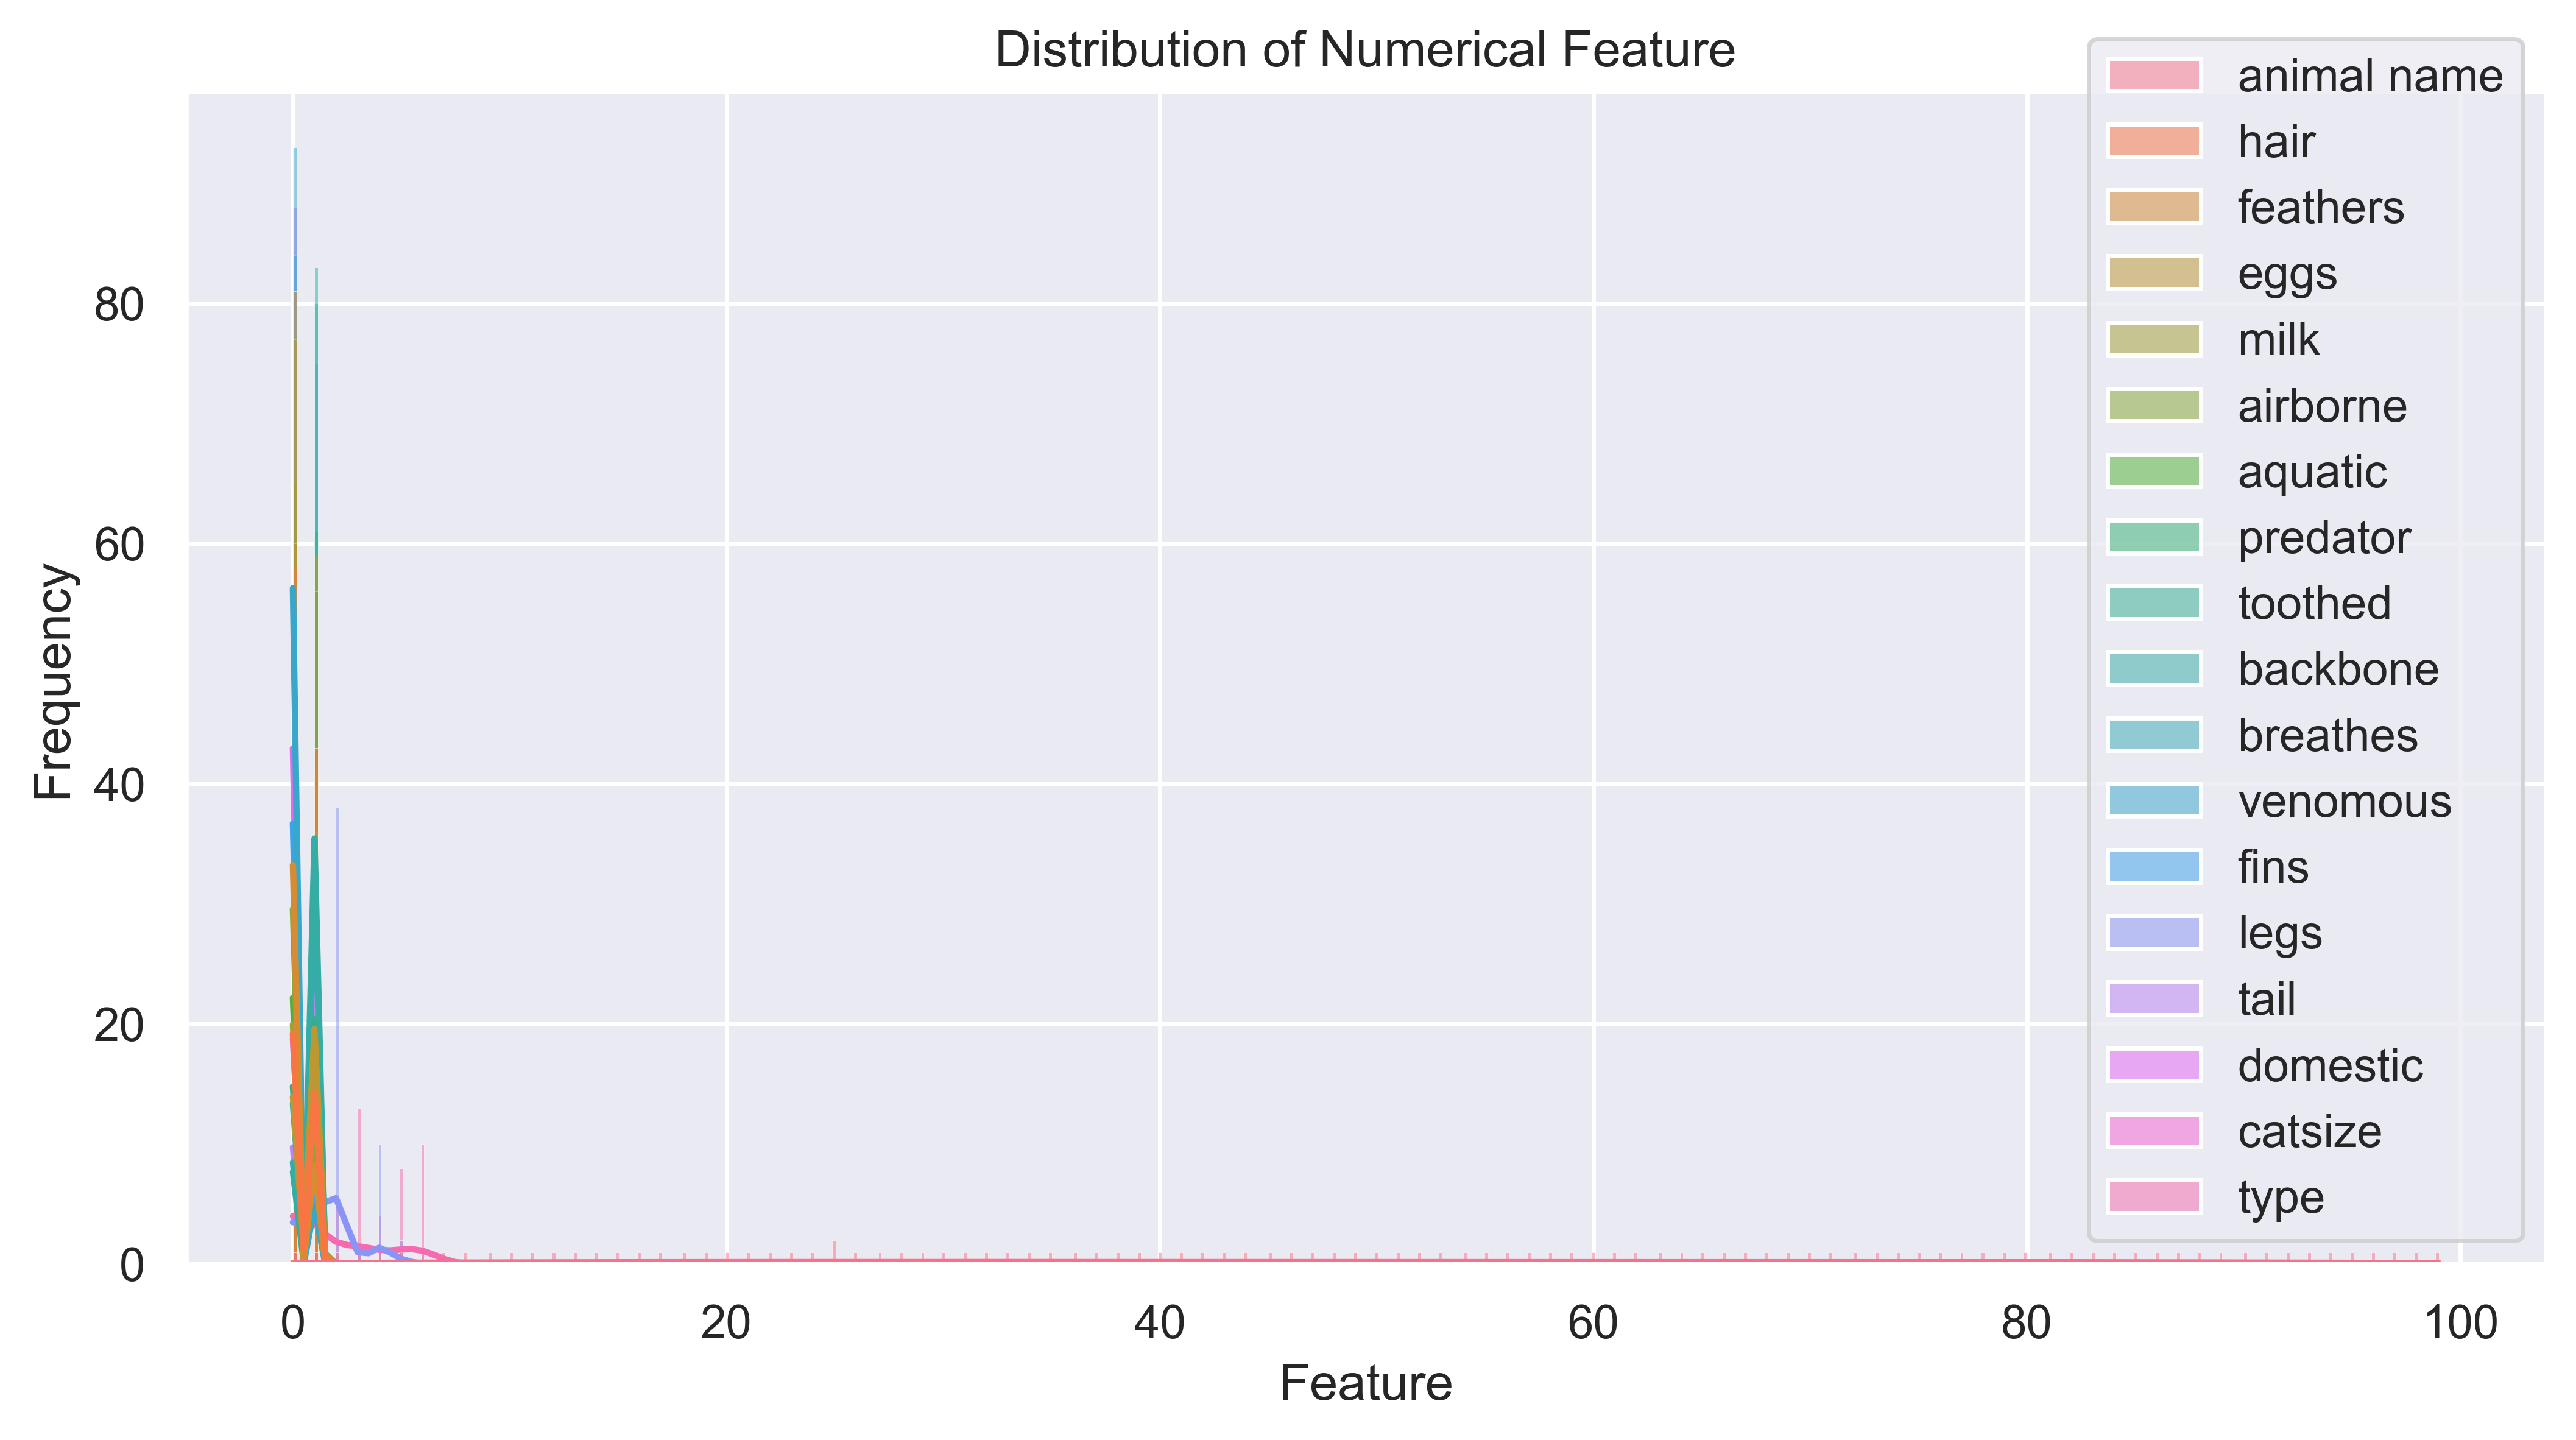

In [317]:
sns.histplot(data = df, kde=True)
plt.title('Distribution of Numerical Feature')
plt.xlabel('Feature')
plt.ylabel('Frequency')

<Axes: >

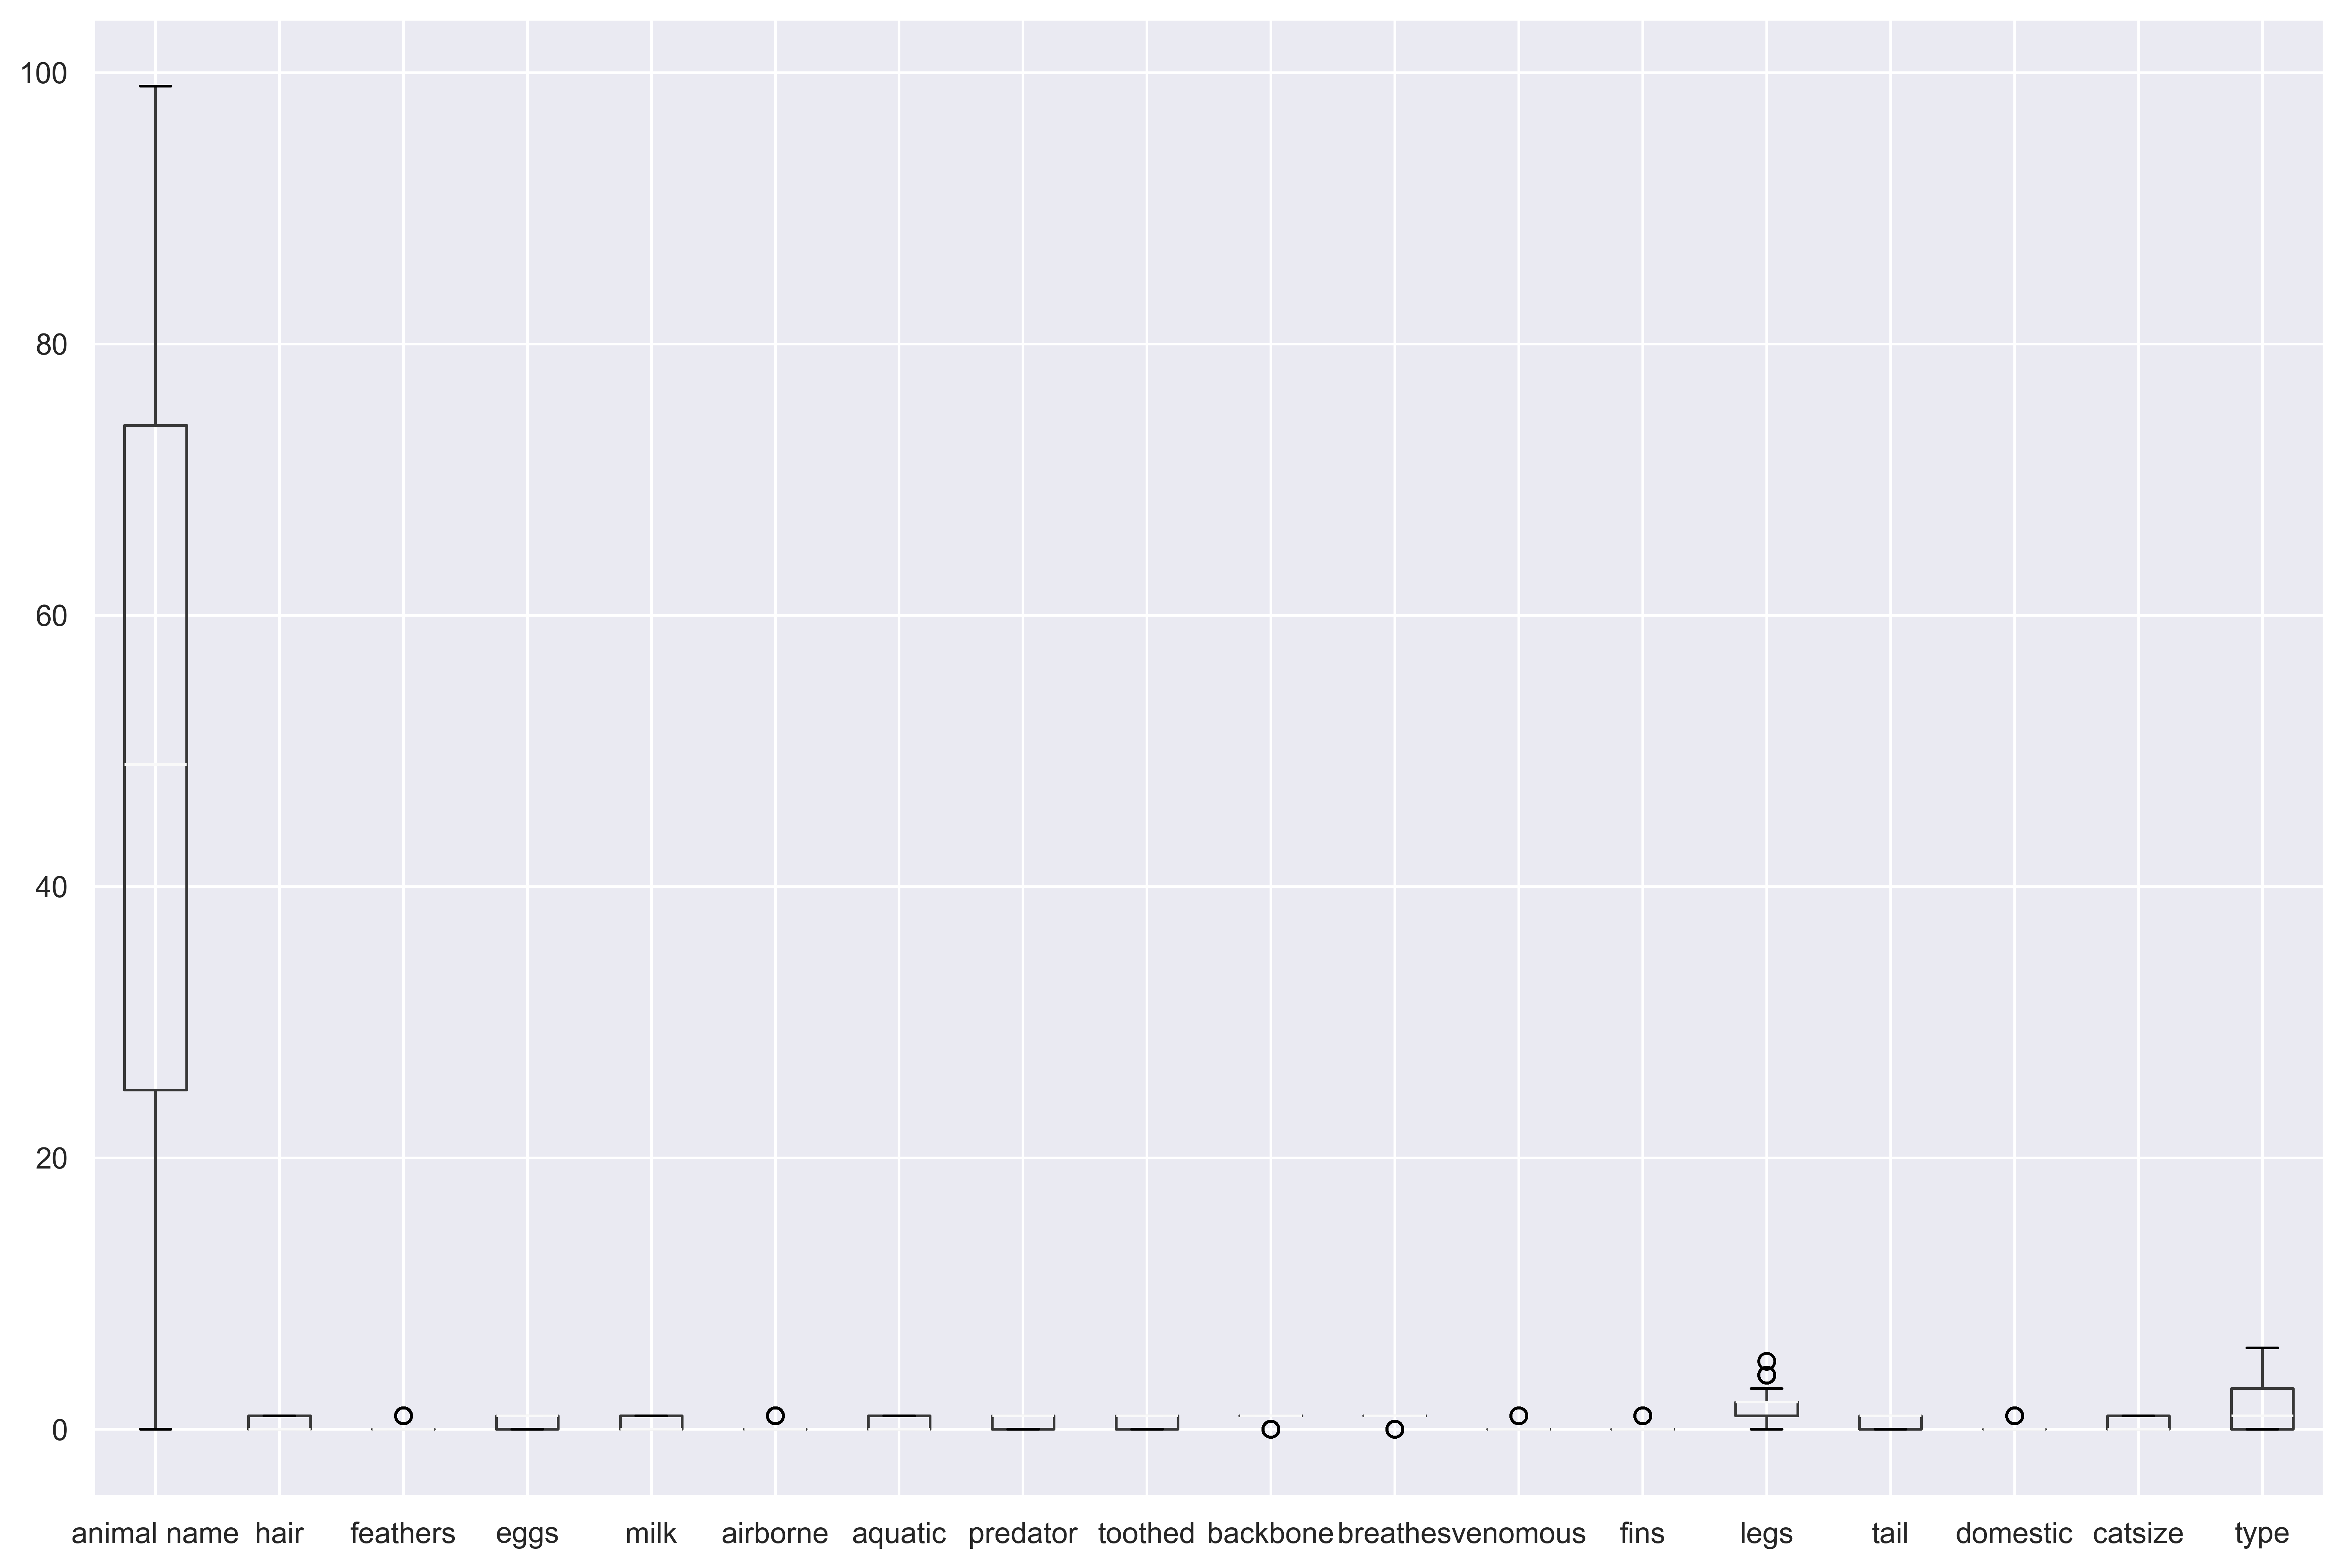

In [321]:
df.boxplot(figsize=(15,10))

In [293]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
4,4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0
97,96,1,0,1,0,1,0,0,0,0,1,1,0,4,0,0,0,5
98,97,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6


In [294]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [295]:
df.loc[:,"animal name":'type']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
4,4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0
97,96,1,0,1,0,1,0,0,0,0,1,1,0,4,0,0,0,5
98,97,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6


In [296]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
4,4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0
97,96,1,0,1,0,1,0,0,0,0,1,1,0,4,0,0,0,5
98,97,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6


In [297]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [298]:
from sklearn.impute import SimpleImputer

In [299]:
si = SimpleImputer(strategy='mean')

df.loc[:,"animal name":'type'] = si.fit_transform(df.loc[:,"animal name":'type'])

In [300]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [301]:
df.describe()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,49.257426,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,1.544554,0.742574,0.128713,0.435644,1.831683
std,28.968829,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,1.253194,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,74.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,3.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,6.000000


In [302]:
x = df.iloc[:,:-1]
y = df['type']

In [303]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-1.70884021,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-1.67414817,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-1.63945614, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.725671  , -0.86103386,  2.01246118, ...,  0.58878406,
        -0.38435306, -0.87859537]])

Split the dataset into training and testing sets (80% training, 20% testing).

In [304]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [305]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.9
0.7654320987654321


Choose an appropriate distance metric and value for K.

In [306]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

In [307]:
train_acc

[1.0,
 0.95,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.85,
 0.8,
 0.7,
 0.7,
 0.65,
 0.6,
 0.6,
 0.55,
 0.35,
 0.3,
 0.3,
 0.3]

In [308]:
test_acc

[0.9259259259259259,
 0.9012345679012346,
 0.7654320987654321,
 0.7901234567901234,
 0.7901234567901234,
 0.7777777777777778,
 0.7901234567901234,
 0.7654320987654321,
 0.7530864197530864,
 0.7160493827160493,
 0.6296296296296297,
 0.5925925925925926,
 0.5185185185185185,
 0.4691358024691358,
 0.38271604938271603,
 0.2716049382716049,
 0.19753086419753085,
 0.1728395061728395,
 0.1728395061728395]

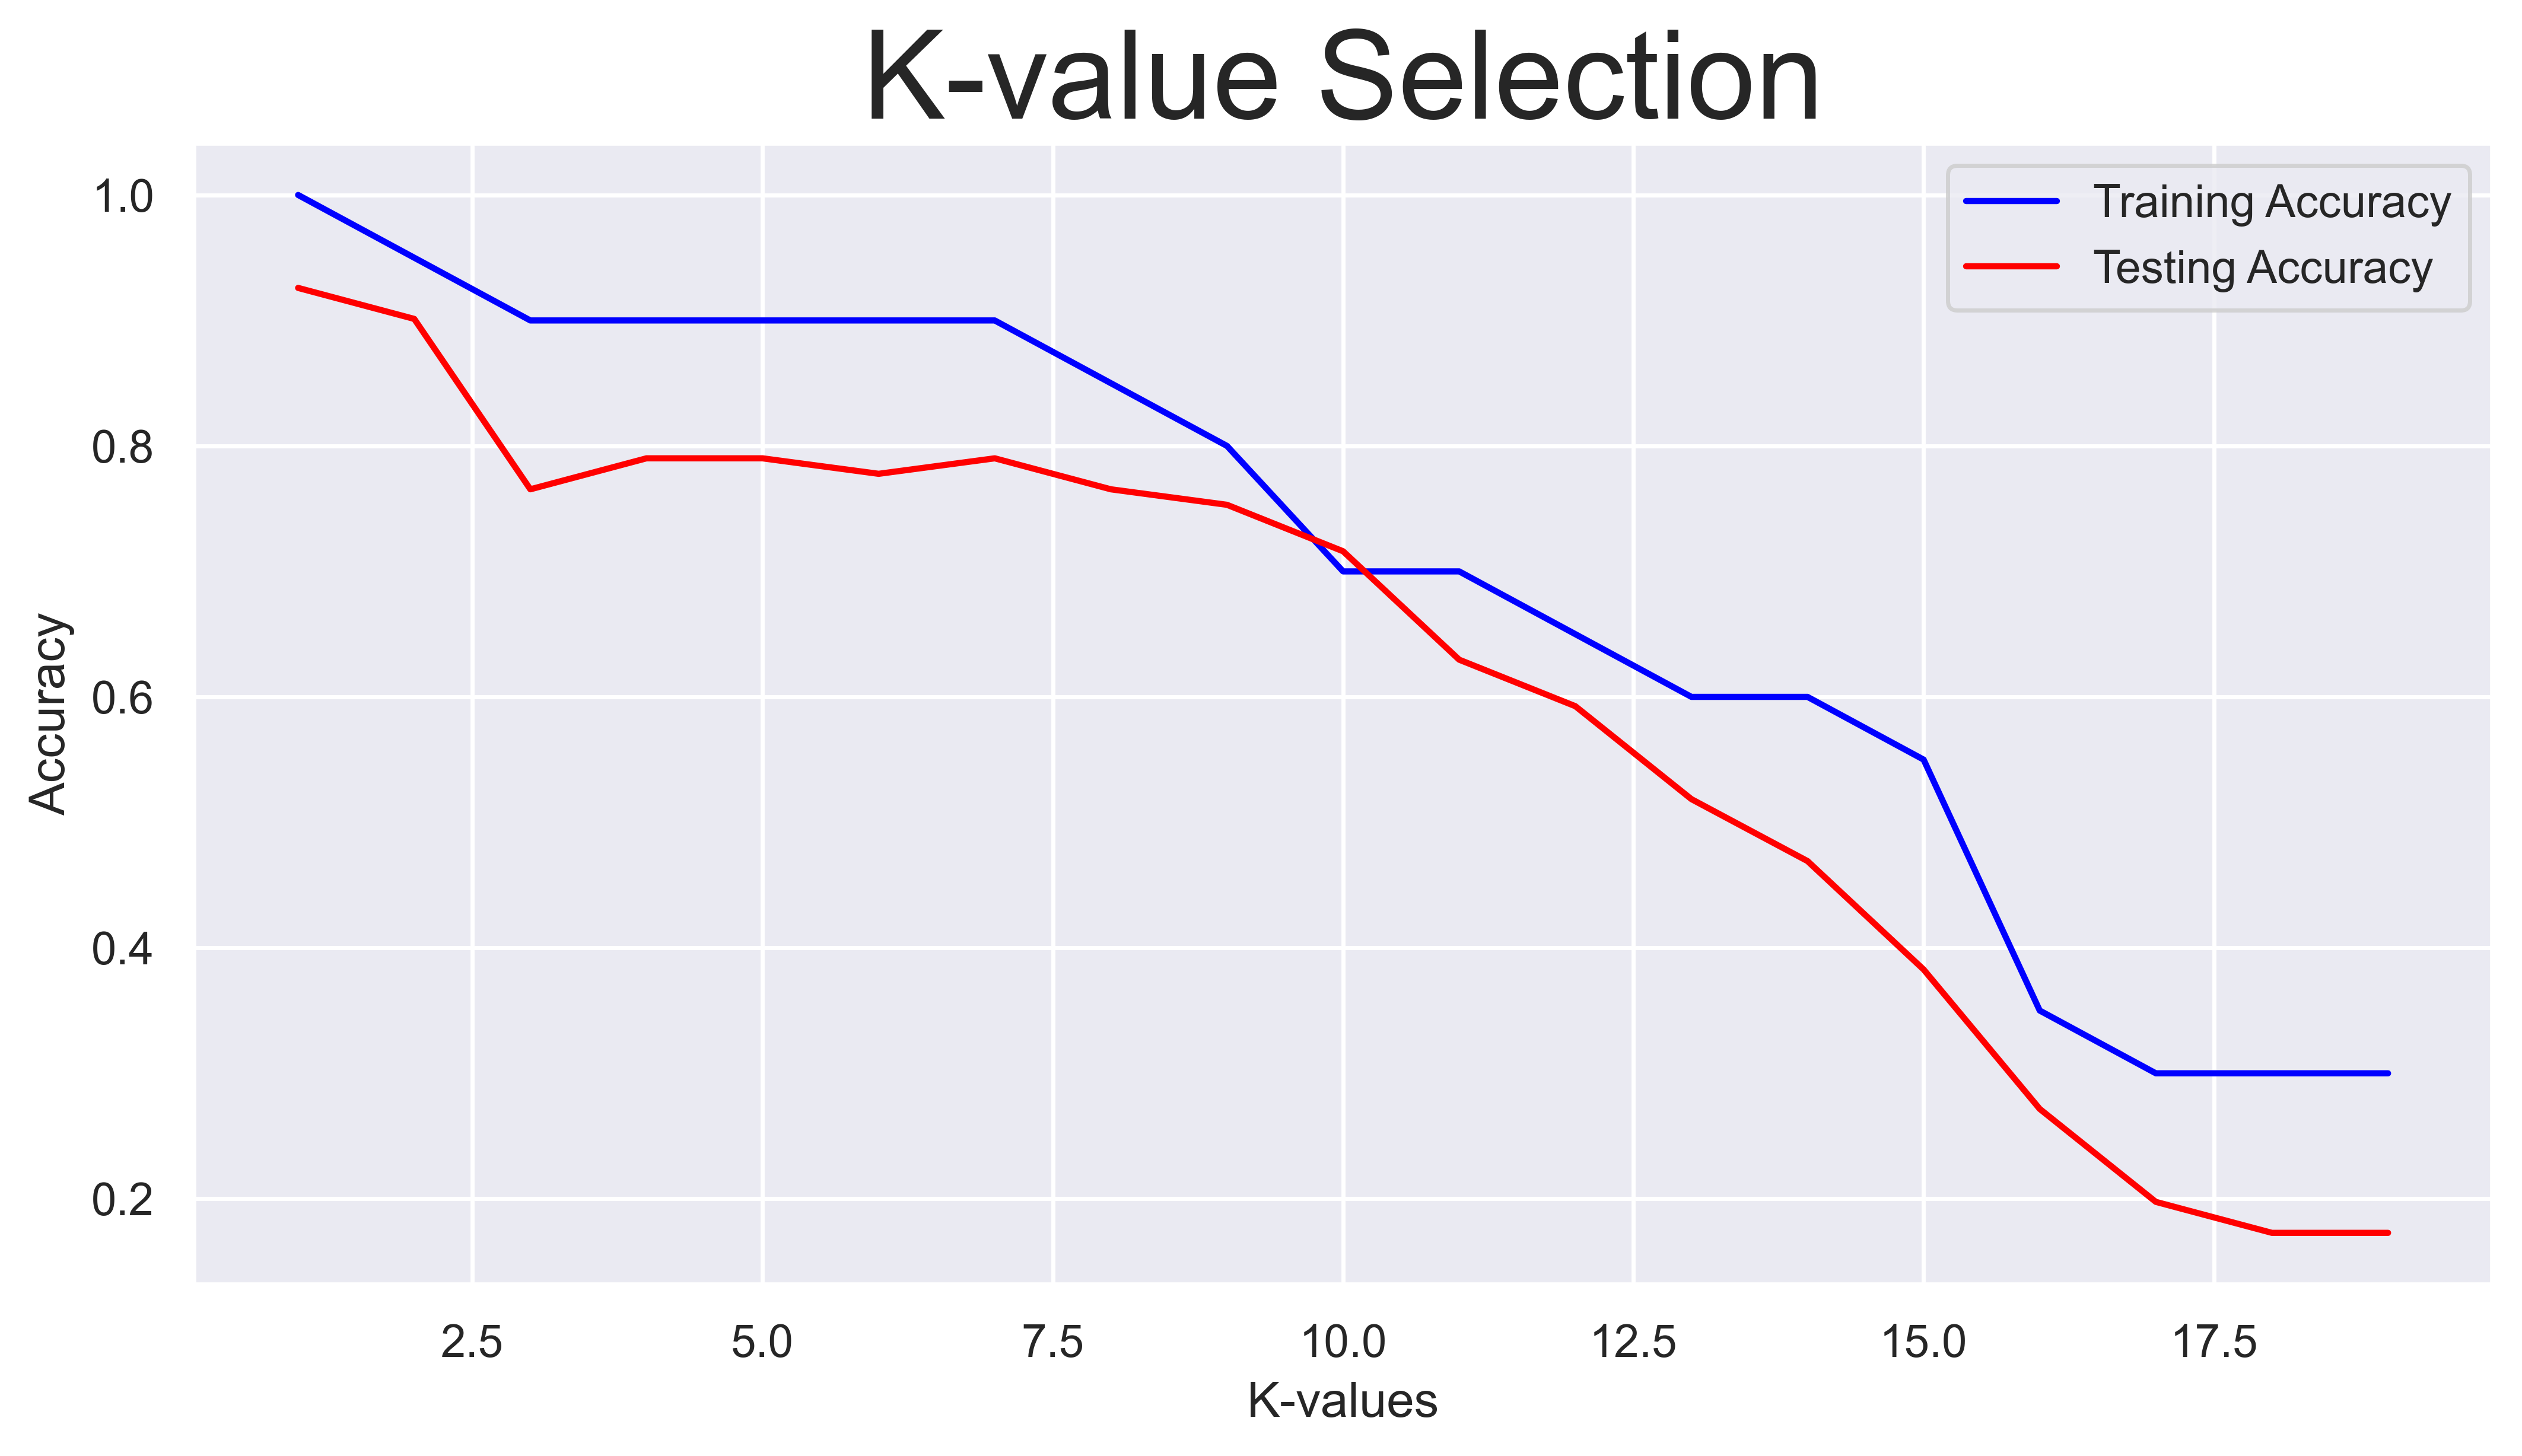

In [309]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [313]:
knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.7
0.7160493827160493


Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics

In [311]:
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  1  0  3  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  2  0  3  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  1  0  3  0  0  3]]
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        37
         1.0       0.50      1.00      0.67        14
         2.0       0.00      0.00      0.00         5
         3.0       0.47      1.00      0.64         8
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         7
         6.0       1.00      0.43      0.60         7

    accuracy                           0.72        81
   macro avg       0.42      0.47      0.41        81
weighted avg       0.68      0.72      0.66        81



# Interview Questions:

1. What are the key hyperparameters in KNN?

In [ ]:
#K (number of neighbors): Determines the number of nearest neighbors considered for classification or regression.
#Distance Metric: Defines how distance is measured between data points, such as Euclidean or Manhattan distance.
#Weighting: Specifies how the contribution of each neighbor is weighted, either equally or based on distance.

2. What distance metrics can be used in KNN?

In [ ]:
#Euclidean Distance: Measures the straight-line distance between two points.
#Manhattan Distance: Calculates the distance between points along axes at right angles.
#Minkowski Distance: A generalization that includes both Euclidean and Manhattan distances as special cases, controlled by a parameter 
